In [1]:
import turicreate as tc

In [2]:
image_train = tc.SFrame('~/ML/Course 1/Week 6/image_train_data/')
image_test = tc.SFrame('~/ML/Course 1/Week 6/image_test_data/')

In [3]:
image_train

Columns:
	id	int
	image	Image
	label	str
	deep_features	array
	image_array	array

Rows: 2005

Data:
+-----+----------------------+------------+-------------------------------+
|  id |        image         |   label    |         deep_features         |
+-----+----------------------+------------+-------------------------------+
|  24 | Height: 32 Width: 32 |    bird    | [0.24287176132202148, 1.09... |
|  33 | Height: 32 Width: 32 |    cat     | [0.5250879526138306, 0.0, ... |
|  36 | Height: 32 Width: 32 |    cat     | [0.5660159587860107, 0.0, ... |
|  70 | Height: 32 Width: 32 |    dog     | [1.129795789718628, 0.0, 0... |
|  90 | Height: 32 Width: 32 |    bird    | [1.7178692817687988, 0.0, ... |
|  97 | Height: 32 Width: 32 | automobile | [1.5781855583190918, 0.0, ... |
| 107 | Height: 32 Width: 32 |    dog     | [0.0, 0.0, 0.2206778526306... |
| 121 | Height: 32 Width: 32 |    bird    | [0.0, 0.23753464221954346,... |
| 136 | Height: 32 Width: 32 | automobile | [0.0, 0.0, 0.0, 0.0, 0.0, ... |
| 138 | Height: 32 Width: 32 |    bird    | [0.6589357256889343, 0.0, ... |
+-----+----------------------+------------+-------------------------------+
+-------------------------------+
|          image_array          |
+-------------------------------+
| [73.0, 77.0, 58.0, 71.0, 6... |
| [7.0, 5.0, 8.0, 7.0, 5.0, ... |
| [169.0, 122.0, 65.0, 131.0... |
| [154.0, 179.0, 152.0, 159.... |
| [216.0, 195.0, 180.0, 201.... |
| [33.0, 44.0, 27.0, 29.0, 4... |
| [97.0, 51.0, 31.0, 104.0, ... |
| [93.0, 96.0, 88.0, 102.0, ... |
| [35.0, 59.0, 53.0, 36.0, 5... |
| [205.0, 193.0, 195.0, 200.... |
+-------------------------------+
[2005 rows x 5 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

In [4]:
image_test

Columns:
	id	int
	image	Image
	label	str
	deep_features	array
	image_array	array

Rows: 4000

Data:
+----+----------------------+------------+-------------------------------+
| id |        image         |   label    |         deep_features         |
+----+----------------------+------------+-------------------------------+
| 0  | Height: 32 Width: 32 |    cat     | [1.1346900463104248, 0.0, ... |
| 6  | Height: 32 Width: 32 | automobile | [0.2313588261604309, 0.0, ... |
| 8  | Height: 32 Width: 32 |    cat     | [0.0, 0.0, 0.0344192385673... |
| 9  | Height: 32 Width: 32 | automobile | [0.0, 0.0, 0.0, 0.0, 0.0, ... |
| 12 | Height: 32 Width: 32 |    dog     | [0.3223174810409546, 0.0, ... |
| 16 | Height: 32 Width: 32 |    dog     | [0.0, 0.0, 0.3473570346832... |
| 24 | Height: 32 Width: 32 |    dog     | [1.3155765533447266, 0.0, ... |
| 25 | Height: 32 Width: 32 |    bird    | [0.0, 0.31728875637054443,... |
| 31 | Height: 32 Width: 32 |    dog     | [0.0, 0.0, 0.0, 0.0, 0.0, ... |
| 33 | Height: 32 Width: 32 |    dog     | [0.1307867169380188, 0.727... |
+----+----------------------+------------+-------------------------------+
+-------------------------------+
|          image_array          |
+-------------------------------+
| [158.0, 112.0, 49.0, 159.0... |
| [160.0, 37.0, 13.0, 185.0,... |
| [23.0, 19.0, 23.0, 19.0, 2... |
| [217.0, 215.0, 209.0, 210.... |
| [91.0, 64.0, 30.0, 82.0, 5... |
| [95.0, 76.0, 78.0, 92.0, 7... |
| [136.0, 134.0, 118.0, 142.... |
| [100.0, 103.0, 74.0, 68.0,... |
| [127.0, 130.0, 81.0, 130.0... |
| [118.0, 113.0, 81.0, 122.0... |
+-------------------------------+
[4000 rows x 5 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

In [5]:
sketch = tc.Sketch(image_train['label'])

In [6]:
sketch


+------------------+-------+----------+
|       item       | value | is exact |
+------------------+-------+----------+
|      Length      |  2005 |   Yes    |
| # Missing Values |   0   |   Yes    |
| # unique values  |   4   |    No    |
+------------------+-------+----------+

Most frequent items:
+------------+-------+
|   value    | count |
+------------+-------+
|    cat     |  509  |
|    dog     |  509  |
| automobile |  509  |
|    bird    |  478  |
+------------+-------+


In [7]:
dog = image_train[image_train['label'] == 'dog']
cat = image_train[image_train['label'] == 'cat']
automobile = image_train[image_train['label'] == 'automobile']
bird = image_train[image_train['label'] == 'bird']

In [8]:
dog_model = tc.nearest_neighbors.create(dog, features = ['deep_features'], label = 'id')
cat_model = tc.nearest_neighbors.create(cat, features = ['deep_features'], label = 'id')
automobile_model = tc.nearest_neighbors.create(automobile, features = ['deep_features'], label = 'id')
bird_model = tc.nearest_neighbors.create(bird, features = ['deep_features'], label = 'id')

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

In [9]:
test_image = image_test[0:1]


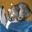

In [10]:
test_image['image'].explore()

In [11]:
cat_model.query(test_image)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 13.745ms     |

| Done         |         | 100         | 84.486ms     |

+--------------+---------+-------------+--------------+

Columns:
	query_label	int
	reference_label	int
	distance	float
	rank	int

Rows: 5

Data:
+-------------+-----------------+--------------------+------+
| query_label | reference_label |      distance      | rank |
+-------------+-----------------+--------------------+------+
|      0      |      16289      | 34.62371920804245  |  1   |
|      0      |      45646      | 36.00687992842462  |  2   |
|      0      |      32139      | 36.52008134363789  |  3   |
|      0      |      25713      | 36.754850252057054 |  4   |
|      0      |       331       | 36.87312281675268  |  5   |
+-------------+-----------------+--------------------+------+
[5 rows x 4 columns]

In [12]:
dog_model.query(test_image)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 16.334ms     |

| Done         |         | 100         | 66.218ms     |

+--------------+---------+-------------+--------------+

Columns:
	query_label	int
	reference_label	int
	distance	float
	rank	int

Rows: 5

Data:
+-------------+-----------------+--------------------+------+
| query_label | reference_label |      distance      | rank |
+-------------+-----------------+--------------------+------+
|      0      |      16976      | 37.464262878423774 |  1   |
|      0      |      13387      | 37.56668321685285  |  2   |
|      0      |      35867      | 37.60472670789396  |  3   |
|      0      |      44603      | 37.70655851529755  |  4   |
|      0      |       6094      | 38.511325490739715 |  5   |
+-------------+-----------------+--------------------+------+
[5 rows x 4 columns]

In [13]:
def get_images_from_ids(query_result):
    return image_train.filter_by(query_result['reference_label'],'id')

In [14]:
cat_neighbors = get_images_from_ids(cat_model.query(test_image))

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 15.288ms     |

| Done         |         | 100         | 85.993ms     |

+--------------+---------+-------------+--------------+


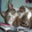
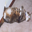
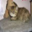
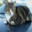
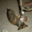

In [15]:
cat_neighbors['image'].explore()

In [16]:
dog_neighbors = get_images_from_ids(dog_model.query(test_image))

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 15.857ms     |

| Done         |         | 100         | 102.496ms    |

+--------------+---------+-------------+--------------+


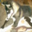
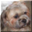
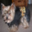
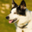
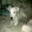

In [17]:
dog_neighbors['image'].explore()

In [18]:
image_test_dog = image_test[image_test['label'] == 'dog']

In [19]:
cat_dog = cat_model.query(image_test_dog, k = 1)

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 4

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 128000  | 25.1473     | 467.602ms    |

| Done         | 509000  | 100         | 557.871ms    |

+--------------+---------+-------------+--------------+

In [20]:
automobile_dog = automobile_model.query(image_test_dog, k = 1)

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 4

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 128000  | 25.1473     | 385.46ms     |

| Done         | 509000  | 100         | 432.359ms    |

+--------------+---------+-------------+--------------+

In [21]:
bird_dog = bird_model.query(image_test_dog, k = 1)

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 4

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 120000  | 25.1046     | 507.772ms    |

| Done         | 478000  | 100         | 570.375ms    |

+--------------+---------+-------------+--------------+

In [22]:
dog_dog = dog_model.query(image_test_dog, k = 1)

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 4

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 127000  | 24.9509     | 441.387ms    |

| Done         | 509000  | 100         | 639.561ms    |

+--------------+---------+-------------+--------------+

In [23]:
dog_distance = tc.SFrame({'dog-dog':dog_dog['distance'], 'dog-cat':cat_dog['distance'], 'dog-automobile':automobile_dog['distance'], 'dog-bird':bird_dog['distance']})

In [24]:
dog_distance

Columns:
	dog-automobile	float
	dog-bird	float
	dog-cat	float
	dog-dog	float

Rows: 1000

Data:
+--------------------+--------------------+--------------------+
|   dog-automobile   |      dog-bird      |      dog-cat       |
+--------------------+--------------------+--------------------+
| 41.95797614571203  | 41.75386473035126  | 36.419607706754384 |
| 46.00213318067788  |  41.3382958924861  | 38.83532688735542  |
| 42.946229069238804 | 38.615759085289056 | 36.97634108541546  |
| 41.68660600484793  | 37.08922699538214  | 34.575007291446106 |
| 39.22696649347584  | 38.27228869398105  | 34.77882479101661  |
| 40.58451176980721  | 39.146208923590486 | 35.11715782924591  |
| 45.10673529610854  | 40.523040105962316 | 40.60958309132649  |
| 41.32211409739762  | 38.19479183926956  | 39.90368673062214  |
| 41.82446549950164  | 40.156713166131446 | 38.067470016821176 |
| 45.497692940110376 | 45.55979626027668  | 42.72587329506032  |
+--------------------+--------------------+--------------------+
+--------------------+
|      dog-dog       |
+--------------------+
| 33.47735903726335  |
| 32.84584956840554  |
| 35.03970731890584  |
| 33.90103276968193  |
| 37.484925090925636 |
| 34.94516534398124  |
| 39.095727834463545 |
| 37.76961310322034  |
| 35.10891446032838  |
| 43.242283258453455 |
+--------------------+
[1000 rows x 4 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

In [25]:
def is_dog_correct(row):
    if row['dog-dog'] < min(row['dog-cat'], row['dog-automobile'], row['dog-bird']):
        return 1
    else:
        return 0

In [26]:
dog_distance.apply(is_dog_correct).sum()

678